In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
from matplotlib.colors import LinearSegmentedColormap
import os

In [2]:
# Create a Tkinter root window (this will not be shown)
root = tk.Tk()
root.withdraw()

# Ask the user to select the first CSV file
csv_file1 = filedialog.askopenfilename(title="Select the first CSV file", filetypes=[("CSV files", "*.csv")])

# Ask the user to select the second CSV file
csv_file2 = filedialog.askopenfilename(title="Select the second CSV file", filetypes=[("CSV files", "*.csv")])

In [6]:
# Get the directory path for the selected files
path = os.path.dirname(csv_file1)
path_1 = path.split('/')
directory_path='/'.join(path_1)
Animal_name= path_1[-1]
print(path_1)
print(directory_path)
print(Animal_name)


['', 'Users', 'kaycei', 'K on Server (NoMachine)', 'KayCei', 'HDC']
/Users/kaycei/K on Server (NoMachine)/KayCei/HDC
HDC


Column names in DataFrame 1:
Index(['Current Behavior Label', 'Previous Behavior Label', 'Count_1',
       'Count_2', 'Count Average'],
      dtype='object')

Column names in DataFrame 2:
Index(['Current Behavior Label', 'Previous Behavior Label', 'Count_1',
       'Count_2', 'Count Average'],
      dtype='object')
    Current Behavior Label Previous Behavior Label  Count_1_1  Count_2_1  \
0        Contra-Body Groom             Contra-Itch       13.0       46.0   
1        Contra-Body Groom           Contra-Orient        5.0       17.0   
2        Contra-Body Groom       Face Groom Type 1        1.0        1.0   
3        Contra-Body Groom              Head Groom        1.0        1.0   
4        Contra-Body Groom      Investigate Type 1        NaN        NaN   
..                     ...                     ...        ...        ...   
207                   Rear      Investigate Type 2       39.0      101.0   
208                   Rear         Ipsi-Body Groom        NaN        2.0   

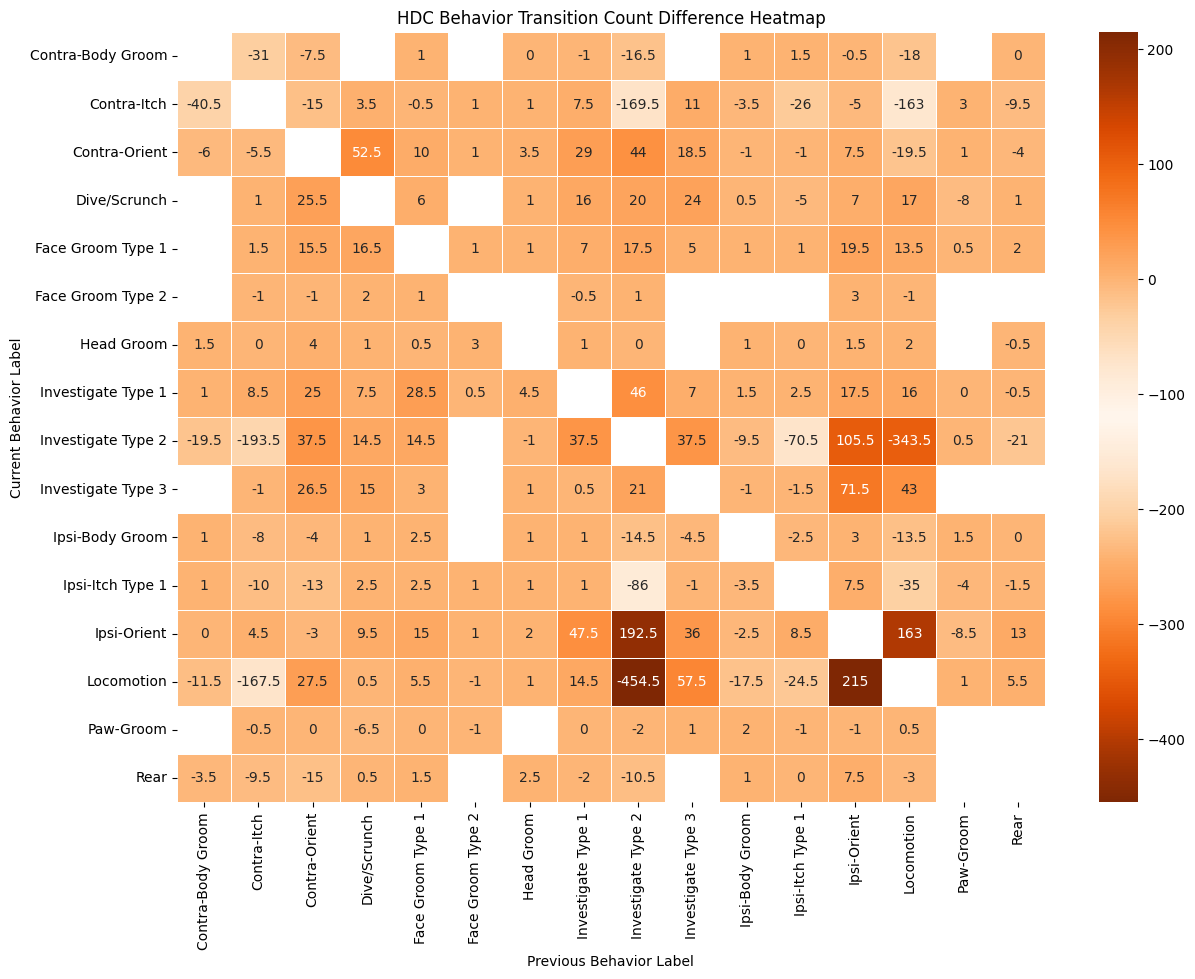

In [18]:
# Check if the user canceled file selection
if not csv_file1 or not csv_file2:
    print("File selection canceled.")
else:
    # Load the selected CSV files into pandas DataFrames
    df1 = pd.read_csv(csv_file1, sep=',')
    df2 = pd.read_csv(csv_file2, sep=',')
    
    # Display the column names for each DataFrame
    print("Column names in DataFrame 1:")
    print(df1.columns)

    print("\nColumn names in DataFrame 2:")
    print(df2.columns)

    ## Merge the two DataFrames based on the behavior labels
    merged_df = pd.merge(df1, df2, on=['Current Behavior Label', 'Previous Behavior Label',], suffixes=('_1', '_2'), how='outer')
  
    # Calculate the difference by subtracting counts_2 from counts_1
    merged_df['Count Difference'] = merged_df['Count Average_1'].fillna(0) - merged_df['Count Average_2'].fillna(0)
    print(merged_df)
    # Calculate the minimum and maximum values of the "Count Difference" column
    min_value = merged_df['Count Difference'].min()
    print(min_value)
    max_value = merged_df['Count Difference'].max()
    print(max_value)
    
    # Calculate the midpoint for the color scales
    midpoint_min = min_value *.50
    print(midpoint_min)
    midpoint_max= max_value*.50
    print(midpoint_max)

    # Create custom colormaps for negative values starting at 50% of min_value
    vivid_colors = plt.get_cmap('Oranges_r')(np.linspace(0, 1))  # Vivid colors for negative values

    # Create custom colormaps for positive values starting at 50% of max_value
    turbo_colors = plt.get_cmap('Oranges')(np.linspace(0, 1))  # Turbo colors for positive values

    # Combine the two colormaps into a single colormap
    custom_cmap = LinearSegmentedColormap.from_list('custom_color_scale', np.vstack((vivid_colors, turbo_colors)), N=256)


    # Combine the two colormaps into a single colormap
    custom_cmap = LinearSegmentedColormap.from_list('custom_color_scale', np.vstack((vivid_colors, turbo_colors)), N=256)

    # Pivot the DataFrame to create a matrix for the heatmap
    heatmap_data = merged_df.pivot(index='Current Behavior Label', columns='Previous Behavior Label', values='Count Difference')

    # Adjust figure size
    plt.figure(figsize=(14, 10))

    # Plot the heatmap
    sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='g', linewidths=.5, cbar=True)

    # Set title and axis labels
    plt.title(f'{Animal_name} Behavior Transition Count Difference Heatmap')
    plt.xlabel('Previous Behavior Label')
    plt.ylabel('Current Behavior Label')

    # Save the heatmap image
    plt.savefig(f"{directory_path}/{Animal_name}_Transition_Difference_Heatmap.png", dpi=300, bbox_inches='tight')

    plt.show()
    plt.close()

In [87]:
y=max_value - midpoint_max
print(y)

125.39999999999999
